# Load data from part 1

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load source of data (csv file) from part 1

In [2]:
data = pd.read_csv('processed_data_real_estate_market.csv', parse_dates=['first_day_exposition'])

Print 10 random rows of the table to get an overview of its structure

In [3]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11058,8,4400000,45.5,2015-10-19,2,2.56,5.0,27.447264,3,False,...,9.1,0,Санкт-Петербург,21973.0,14703.0,0,NaN,0,NaN,837.0
10749,7,5150000,38.0,2018-04-13,1,2.50,25.0,18.000000,6,False,...,10.0,0,Санкт-Петербург,30073.0,10337.0,0,NaN,0,NaN,364.0
11889,10,5200000,74.5,2016-04-13,3,2.65,5.0,42.100000,4,False,...,11.5,0,посёлок Шушары,18214.0,30905.0,0,NaN,0,NaN,76.0
17964,5,10000000,50.0,2016-11-19,2,3.40,5.0,30.000000,3,False,...,8.0,0,Санкт-Петербург,21534.0,1096.0,1,640.0,2,81.0,485.0
16168,4,4900000,50.0,2017-01-20,2,2.50,9.0,32.000000,9,False,...,7.0,0,Санкт-Петербург,15964.0,9626.0,1,314.0,3,421.0,436.0
6786,8,5815000,34.4,2018-02-16,1,2.70,13.0,16.388375,2,False,...,9.5,0,Санкт-Петербург,37412.0,8370.0,1,392.0,2,359.0,234.0
10884,10,11600000,86.4,2019-02-12,3,2.75,25.0,48.200000,11,False,...,13.2,2,Санкт-Петербург,18081.0,14303.0,2,75.0,0,NaN,NaN
2668,20,4100000,44.4,2018-10-16,2,2.60,5.0,27.300000,5,False,...,6.2,0,Санкт-Петербург,27425.0,7693.0,0,NaN,0,NaN,49.0
8002,6,900000,30.3,2016-08-25,1,2.50,5.0,17.500000,3,False,...,4.9,1,деревня Белогорка,NaN,NaN,0,NaN,0,NaN,630.0
480,0,7050000,78.0,2015-11-18,3,2.65,5.0,54.000000,3,False,...,8.0,1,Санкт-Петербург,21868.0,10779.0,3,226.0,0,NaN,470.0


Get general information about the data in the table

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.694471,10.667750,34.566862,5.892358,10.428526,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.199224,6.585961,22.283072,4.885249,5.631126,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.400000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.334677,8.000000,11.440000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,3.540000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


# Data enrichment

Add the following columns which help to answer questions from data owner:
- price per square meter
- weekday when an announcement was published (0 - Monday, 1 - Tuesday, and so on)
- month when an announcement was published
- year when an announcement was published
- type of apartment floor (3 groups: "first", "last", "other")

##  Add price per square meter

In [6]:
data['price_sq_meter'] = data['last_price'] / data['total_area']

##  Add weekday of announcement publishing

In [7]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data[['first_day_exposition', 'day_of_week']].sample(5)

,first_day_exposition,day_of_week
17377,2018-02-22,3
10909,2018-03-19,0
23654,2017-03-13,0
4614,2017-04-07,4
9424,2019-02-28,3


## Add month and year of announcement publishing

In [8]:
data['month'] = data['first_day_exposition'].dt.date.astype('datetime64[M]') 
data[['first_day_exposition', 'month']].sample(5)

,first_day_exposition,month
16518,2016-03-10,2016-03-01
4456,2015-11-18,2015-11-01
13077,2017-10-20,2017-10-01
18664,2017-08-25,2017-08-01
14027,2018-02-13,2018-02-01


In [9]:
data['year'] = data['first_day_exposition'].dt.year
data[['first_day_exposition', 'year']].sample(5)

,first_day_exposition,year
21228,2018-09-13,2018
11782,2016-07-07,2016
16227,2017-03-14,2017
8856,2015-10-15,2015
20941,2016-10-05,2016


## Add type of apartment floor

Auxiliary function

In [10]:
def floor_type(floors_total, floor):
    if floor == 'NaN':
        return "other"
    elif floor == 1:
        return " first"
    elif floors_total == 'NaN':
        return "other"
    elif floor == floors_total:
        return "last"
    else:
        return "other"

In [11]:
data['floor_type'] = data.apply(lambda x: floor_type(x['floors_total'], x['floor']), axis=1)
data[['floor', 'floors_total', 'floor_type']].sample(5)

,floor,floors_total,floor_type
16215,11,16.0,other
11105,2,9.0,other
16986,4,4.0,last
13563,3,6.0,other
18494,2,5.0,other


## Section 3 conclusions

We added 5 required columns

# Exploring the data and answering the data owner's questions

## List of questions:
- Analysis of features and their influence on the **total price** of the object:
    - total_area
    - living_area
    - kitchen_area
    - rooms
    - floor_type
    - month
    - year
- Analysis of average price per sq. meter in 10 localities with the largest number of advertisements
- Analysis of total price dependence on the distance to St. Petersburg city center

## Influence on the **total cost**

### Auxiliary functions

In [12]:
def corr_for_square_features(data, feature, target, color): 
    
    # Calculate Pearson correlation coefficient
    coeff = data[target].corr(data[feature])    
    print('Pearson correlation coefficient for {0} and {1}: {2:.2f}'.format(target, feature, coeff))
    
    # Let's group the data using the mean value     
    scatter = data.groupby(by=[feature])[target].mean()

    plt.subplots(figsize=(15, 4))
    
    # Add axis names and the chart title
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title('Influence of ' + feature + ' on ' + target)    
    
    # Add axis limits to mitigate effects of outliers
    plt.xlim([0, data[feature].quantile(0.99)])
    plt.ylim([0, data[target].quantile(0.99)])
    plt.scatter(scatter.index, scatter.values, c=color, alpha=0.6)

    plt.show()    

In [13]:
def mean_and_median_by_caterory(data, feature, target):
        
    # Calculate Pearson correlation coefficient
    try:
        coeff = data[target].corr(data[feature])    
        print('Pearson correlation coefficient for {0} and {1}: {2:.2f}'.format(target, feature, coeff))
    except:
        print()
    
    # Create 2 series by category
    scatter_median = data.groupby(by=[feature])[target].median()
    scatter_mean = data.groupby(by=[feature])[target].mean()
    
    plt.subplots(figsize=(12, 2.5))

    plt.scatter(scatter_median.index, scatter_median.values, c='orange', alpha=0.6, label='median')
    plt.scatter(scatter_mean.index, scatter_mean.values, c='grey', alpha=0.6, label='mean')
    
    # Add axis names and the chart title
    plt.xlabel(feature)
    plt.ylabel(target + ' aggregated functions')
    plt.title('Influence of ' + feature + ' on ' + target)
    
    # Add labels on the x axis
    if feature != 'month':
        plt.xticks(scatter_median.index)
    
    plt.legend()
    
    plt.show()

### Compare the impact of features: total_area, living_area, kitchen_area

Pearson correlation coefficient for last_price and total_area: 0.65


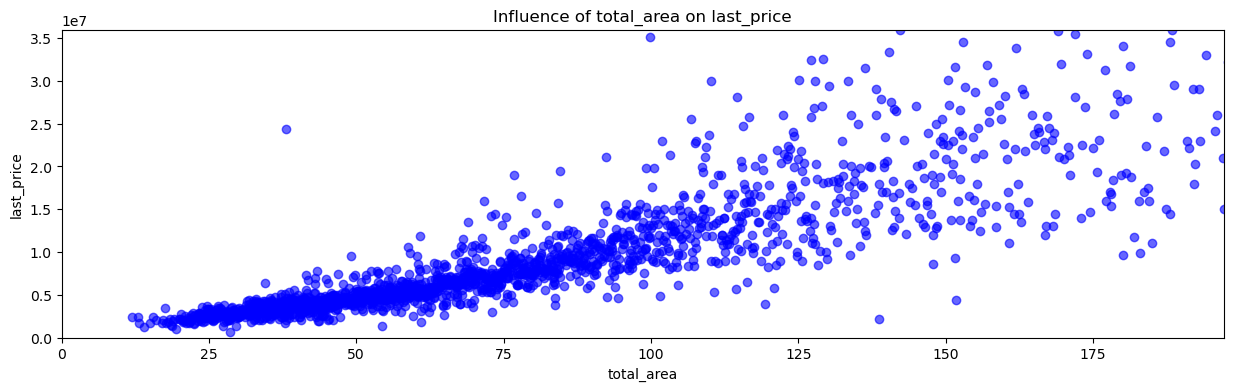

Pearson correlation coefficient for last_price and living_area: 0.58


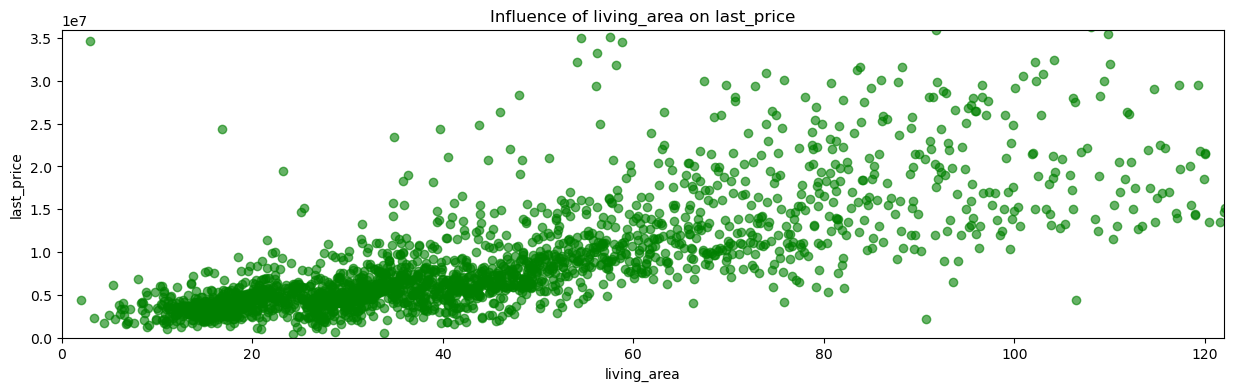

Pearson correlation coefficient for last_price and kitchen_area: 0.44


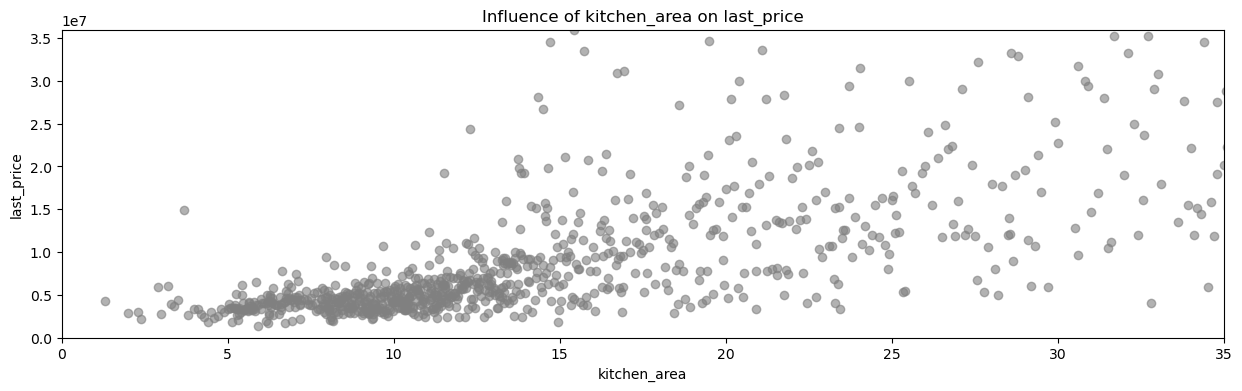

In [14]:
square_features = ['total_area', 'living_area', 'kitchen_area']
square_colors = ['blue', 'green', 'grey']

for i in range(len(square_features)): 
    corr_for_square_features(data, square_features[i], 'last_price', square_colors[i])

### Compare the impact of features: rooms, floor_type, month, year

Pearson correlation coefficient for last_price and rooms: 0.36


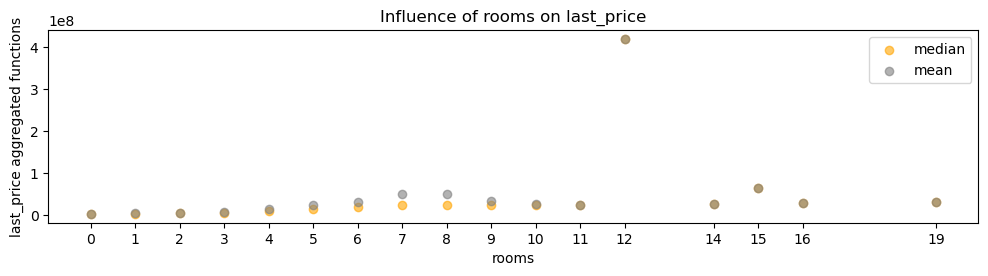

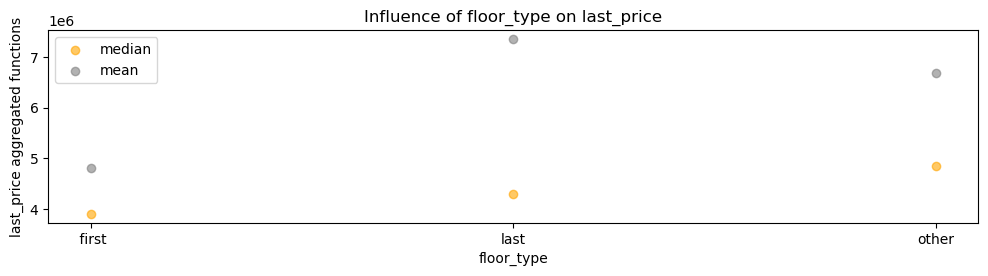

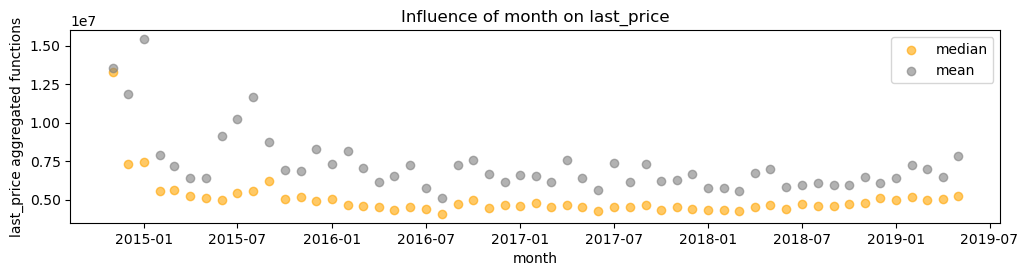

Pearson correlation coefficient for last_price and year: -0.04


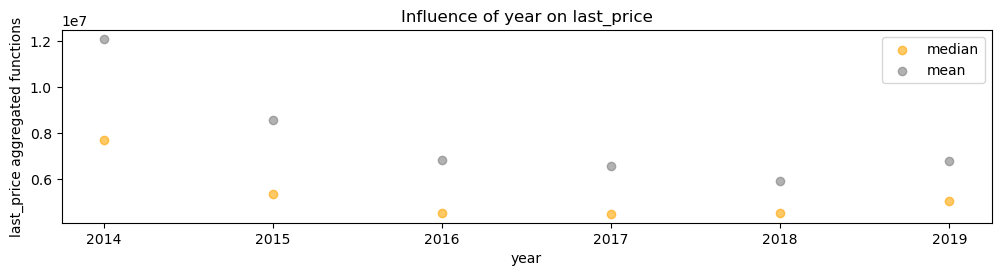

In [15]:
categ_features = ['rooms', 'floor_type', 'month', 'year']

for i in range(len(categ_features)): 
    mean_and_median_by_caterory(data, categ_features[i], 'last_price')

In [16]:
apartments_with_12_rooms = len(data[data['rooms'] == 12])
print('Number of apartments with 12 rooms: {0}'.format(apartments_with_12_rooms))

Number of apartments with 12 rooms: 1


In [17]:
value_counts = data['floor_type'].value_counts()

percentage_counts = value_counts / len(data) * 100

formatted_percentage_counts = percentage_counts.apply(lambda x: "{:.1f}%".format(x))

print(formatted_percentage_counts)

other     73.6%
last      14.1%
 first    12.3%
Name: floor_type, dtype: object


### Outcomes of feature comparison

-  **total_area** has the highest correlation coefficient with **last_price** among "square features", it equals **0.65**. We also see the "smallest spread" on the graph which increases after 100 square meters. **kitchen_area** has the worst metrics, **living_area** is a little worse than **total_area**.


- Number of rooms: correlation coefficient is 0.36. That is why this factor "weakly" affects the price of the apartment. We can see a rise in average values up to 8 rooms (which looks logical), then a slight dip and outlier at 12 rooms (which is caused by one expensive properties).


- Type of floor: Apartments on the first floor have the lowest mean and median prices. Apartments on the top floor have higher prices. We also see a significant number of outliers in top floor prices for the difference between the mean and the median. Apartments on the other floors have the highest prices.


- In relation to the announcement date, we see average price values dropping until July 2018, then recovering to 2017 values. In some months, we see bounces from the trend curve.

## Analysis of average price per sq. meter in 10 localities with the largest number of advertisements

Let's start by identifying and forming a list of the 10 localities with the highest number of announcements

In [18]:
number_objects = data.groupby(by='locality_name')['last_price'].count().sort_values(ascending=False)
number_objects.head(10)

locality_name
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: last_price, dtype: int64

In [19]:
cities = number_objects.index[:10]
print(cities)

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object', name='locality_name')


Let's draw a graph of price distribution

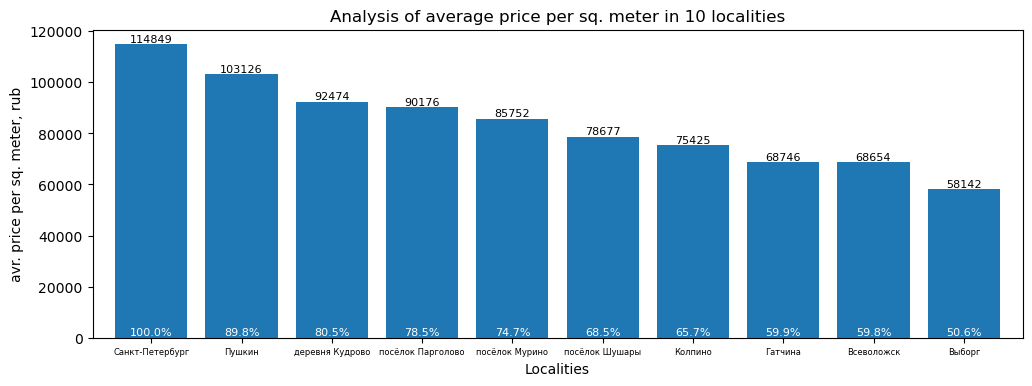

In [20]:
df = data[data['locality_name'].isin(cities)]
raw_sq_meter = df.groupby(by=['locality_name']).agg({'price_sq_meter': 'mean'})

sq_meter_cities = raw_sq_meter['price_sq_meter'].sort_values(ascending=False)

plt.subplots(figsize=(12, 4))

ax = sq_meter_cities.plot(kind='bar', width=0.8)

# Add captions with percentages of the maximum value
max_value = sq_meter_cities.max()

for i, value in enumerate(sq_meter_cities):
    percentage = (value / max_value) * 100
    ax.annotate(f'{value:.0f}', (i, value), ha='center', va='bottom', fontsize=8)
    ax.annotate(f'{percentage:.1f}%', (i, percentage), ha='center', va='bottom', fontsize=8, color='white')
    
# Add axis names and the chart title
plt.xlabel('Localities')
plt.ylabel('avr. price per sq. meter, rub')
plt.title('Analysis of average price per sq. meter in 10 localities')

plt.xticks(rotation=0, fontsize=6)

plt.show()

### Outcomes of average price per sq. meter analysis

- The locality with the highest price per square meter is expectedly **St. Petersburg 114 849 rubles per 1 sq.m.**
- The cost of a square meter in the second place in the ranking - Pushkin city - is 10% less, in the village Kudrovo (#3) is already 20% less
- Vyborg rounds out the top 10 with the cost per square meter twice lower than in St. Petersburg 

## Analysis of total price dependence on the distance to St. Petersburg city center

First, we create a separate column with the values of distance to the center of St. Petersburg in km and then plot a line graph

In [21]:
data_Peter = data.loc[data['locality_name'] == "Санкт-Петербург", :].copy()

data_Peter['km_distance'] = (data_Peter['cityCenters_nearest'] / 1000).round(0)

# Series that combines price and distance
distance_price = data_Peter.groupby(by=['km_distance'])['last_price'].mean()

# Series that combines number of apartments and distance
distance_appartment_number = data_Peter['km_distance'].value_counts().sort_index()

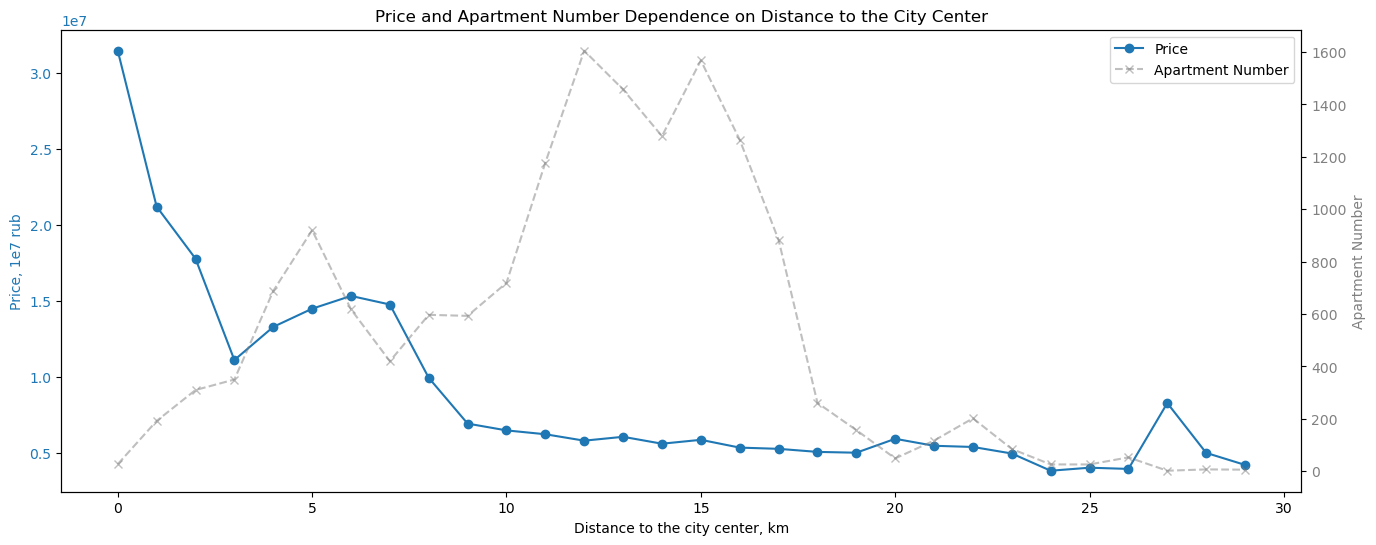

In [22]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# Settings for the price & distance line
ax1.plot(distance_price.index, distance_price.values, marker='o', linestyle='-', label='Price')
ax1.set_xlabel('Distance to the city center, km')
ax1.set_ylabel('Price, 1e7 rub', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Setting for the appartment number & distance line
ax2 = ax1.twinx()

ax2.plot(distance_appartment_number.index, distance_appartment_number.values, marker='x', linestyle='--', color='grey',\
         alpha=0.5, label='Apartment Number')
ax2.set_ylabel('Apartment Number', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

# Chart title
plt.title('Price and Apartment Number Dependence on Distance to the City Center')

plt.show()


- We see a general trend: the cost of the object is inversely proportional to the distance to the city center, though with some exceptions.

- Let's describe some segments on the price & distance line (blue one): 
    - a sharp drop in price at the area from 0 to 3 km (which is caused by an increase in object number); 
    - a gradual growth up to 6 km;
    - a significant drop in price from 7 to 9 km;
    - a smooth decreasing trend up to 26 km; 
    - a jump up near 27 km, which is caused by a few apartments with high price.